# GA DSI Capstone Project - Malware Classification
by: Kwek Jun Hong (GA SG DSI 26)
***

# Notebook organisation:
- Notebook 1 - Data Cleaning, Feature Selection, EDA and Data Visualization 
- **Notebook 2 - Model Data Preparation and Modeling (current notebook)**

# Progress

In this notebook, the next step would be to prepare the data for modeling and to carry out the modeling process. 

# Import Libraries

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('ticks')

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.metrics import f1_score , recall_score , accuracy_score , precision_score , roc_auc_score , confusion_matrix , plot_roc_curve
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay

import joblib

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.metrics import AUC, Precision, Recall, TruePositives, TrueNegatives, FalsePositives, FalseNegatives
from tensorflow.keras.callbacks import EarlyStopping
from keras.models import load_model

# Import Data

In [2]:
# list of dtypes of the features

dtypes = {
        'MachineIdentifier':                                    'category',
        'ProductName':                                          'category',
        'EngineVersion':                                        'category',
        'AppVersion':                                           'category',
        'AvSigVersion':                                         'category',
        'IsBeta':                                               'int8',
        'RtpStateBitfield':                                     'float16',
        'IsSxsPassiveMode':                                     'int8',
        'DefaultBrowsersIdentifier':                            'float16',
        'AVProductStatesIdentifier':                            'float32',
        'AVProductsInstalled':                                  'float16',
        'AVProductsEnabled':                                    'float16',
        'HasTpm':                                               'int8',
        'CountryIdentifier':                                    'int16',
        'CityIdentifier':                                       'float32',
        'OrganizationIdentifier':                               'float16',
        'GeoNameIdentifier':                                    'float16',
        'LocaleEnglishNameIdentifier':                          'int8',
        'Platform':                                             'category',
        'Processor':                                            'category',
        'OsVer':                                                'category',
        'OsBuild':                                              'int16',
        'OsSuite':                                              'int16',
        'OsPlatformSubRelease':                                 'category',
        'OsBuildLab':                                           'category',
        'SkuEdition':                                           'category',
        'IsProtected':                                          'float16',
        'AutoSampleOptIn':                                      'int8',
        'PuaMode':                                              'category',
        'SMode':                                                'float16',
        'IeVerIdentifier':                                      'float16',
        'SmartScreen':                                          'category',
        'Firewall':                                             'float16',
        'UacLuaenable':                                         'float32',
        'Census_MDC2FormFactor':                                'category',
        'Census_DeviceFamily':                                  'category',
        'Census_OEMNameIdentifier':                             'float16',
        'Census_OEMModelIdentifier':                            'float32',
        'Census_ProcessorCoreCount':                            'float16',
        'Census_ProcessorManufacturerIdentifier':               'float16',
        'Census_ProcessorModelIdentifier':                      'float16',
        'Census_ProcessorClass':                                'category',
        'Census_PrimaryDiskTotalCapacity':                      'float32',
        'Census_PrimaryDiskTypeName':                           'category',
        'Census_SystemVolumeTotalCapacity':                     'float32',
        'Census_HasOpticalDiskDrive':                           'int8',
        'Census_TotalPhysicalRAM':                              'float32',
        'Census_ChassisTypeName':                               'category',
        'Census_InternalPrimaryDiagonalDisplaySizeInInches':    'float16',
        'Census_InternalPrimaryDisplayResolutionHorizontal':    'float16',
        'Census_InternalPrimaryDisplayResolutionVertical':      'float16',
        'Census_PowerPlatformRoleName':                         'category',
        'Census_InternalBatteryType':                           'category',
        'Census_InternalBatteryNumberOfCharges':                'float32',
        'Census_OSVersion':                                     'category',
        'Census_OSArchitecture':                                'category',
        'Census_OSBranch':                                      'category',
        'Census_OSBuildNumber':                                 'int16',
        'Census_OSBuildRevision':                               'int32',
        'Census_OSEdition':                                     'category',
        'Census_OSSkuName':                                     'category',
        'Census_OSInstallTypeName':                             'category',
        'Census_OSInstallLanguageIdentifier':                   'float16',
        'Census_OSUILocaleIdentifier':                          'int16',
        'Census_OSWUAutoUpdateOptionsName':                     'category',
        'Census_IsPortableOperatingSystem':                     'int8',
        'Census_GenuineStateName':                              'category',
        'Census_ActivationChannel':                             'category',
        'Census_IsFlightingInternal':                           'float16',
        'Census_IsFlightsDisabled':                             'float16',
        'Census_FlightRing':                                    'category',
        'Census_ThresholdOptIn':                                'float16',
        'Census_FirmwareManufacturerIdentifier':                'float16',
        'Census_FirmwareVersionIdentifier':                     'float32',
        'Census_IsSecureBootEnabled':                           'int8',
        'Census_IsWIMBootEnabled':                              'float16',
        'Census_IsVirtualDevice':                               'float16',
        'Census_IsTouchEnabled':                                'int8',
        'Census_IsPenCapable':                                  'int8',
        'Census_IsAlwaysOnAlwaysConnectedCapable':              'float16',
        'Wdft_IsGamer':                                         'float16',
        'Wdft_RegionIdentifier':                                'float16',
        'HasDetections':                                        'int8'
        }

In [3]:
train = pd.read_csv('../data/train_cleaned.csv', dtype = dtypes)
train.head()

,machineidentifier,engineversion,appversion,avproductsinstalled,countryidentifier,organizationidentifier,localeenglishnameidentifier,osbuild,ossuite,osplatformsubrelease,...,census_osedition,census_osskuname,census_osinstalltypename,census_osuilocaleidentifier,census_oswuautoupdateoptionsname,census_activationchannel,census_firmwaremanufactureridentifier,census_issecurebootenabled,wdft_isgamer,hasdetections
0,0000028988387b115f69f31a3bf04f09,1.1.15100.1,4.18.1807.18075,1.0,29,18.0,0,17134,256,rs4,...,Professional,PROFESSIONAL,UUPUpgrade,0,UNKNOWN,Retail,628.0,0,0.0,0
1,000007535c3f730efa9ea0b7ef1bd645,Other,Other,1.0,93,18.0,0,17134,256,rs4,...,Professional,PROFESSIONAL,IBSClean,31,UNKNOWN,Retail,628.0,0,0.0,0
2,000007905a28d863f6d0d597892cd692,1.1.15100.1,4.18.1807.18075,1.0,0,18.0,0,17134,768,rs4,...,Core,CORE,UUPUpgrade,30,FullAuto,Other,142.0,0,0.0,0
3,00000b11598a75ea8ba1beea8459149f,1.1.15100.1,4.18.1807.18075,1.0,0,0.0,0,17134,256,rs4,...,Professional,PROFESSIONAL,UUPUpgrade,0,FullAuto,Other,0.0,0,0.0,1
4,000014a5f00daa18e76b81417eeb99fc,1.1.15100.1,4.18.1807.18075,1.0,0,0.0,75,17134,768,rs4,...,Core,CORE,Update,31,FullAuto,Retail,0.0,0,0.0,1


In [4]:
test = pd.read_csv('../data/test_cleaned.csv', dtype = dtypes)
test.head()

,machineidentifier,engineversion,appversion,avproductsinstalled,countryidentifier,organizationidentifier,localeenglishnameidentifier,osbuild,ossuite,osplatformsubrelease,...,census_osbuildrevision,census_osedition,census_osskuname,census_osinstalltypename,census_osuilocaleidentifier,census_oswuautoupdateoptionsname,census_activationchannel,census_firmwaremanufactureridentifier,census_issecurebootenabled,wdft_isgamer
0,0000010489e3af074adeac69c53e555e,1.1.15400.5,4.18.1810.5,1.0,43,18.0,42,15063,768,rs2,...,1387,Core,CORE,Reset,158,AutoInstallAndRebootAtMaintenanceTime,OEM:DM,807.0,1,0.0
1,00000176ac758d54827acd545b6315a5,1.1.15400.4,4.18.1809.2,1.0,68,0.0,74,16299,768,rs3,...,611,Core,CORE,UUPUpgrade,30,AutoInstallAndRebootAtMaintenanceTime,Retail,554.0,1,1.0
2,0000019dcefc128c2d4387c1273dae1d,1.1.15300.6,4.18.1809.2,2.0,201,0.0,-5,14393,768,rs1,...,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,148,UNKNOWN,OEM:DM,556.0,1,1.0
3,0000055553dc51b1295785415f1a224d,1.1.15400.5,4.18.1810.5,2.0,29,0.0,-85,16299,768,rs3,...,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,119,Notify,OEM:DM,628.0,1,0.0
4,00000574cefffeca83ec8adf9285b2bf,1.1.15400.4,4.18.1809.2,1.0,171,18.0,-74,16299,768,rs3,...,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,125,UNKNOWN,Retail,556.0,1,1.0


# Model Data Preparation
***

## Random Sample of the dataset 

Due to the constraints of time and computing power, the original `train` dataset will be random sampled to a more manageable number of 100,000 rows instead of modeling the entire `train` dataset which contains 8.9 million rows. 

There would be a loss of certain information when the dataset is random sampled to a smaller number of rows but this is a tradeoff that has to be accepted due to real world limitations. 

In [5]:
train_sample = train.sample(n = 100_000, random_state = 42)
train_sample.shape

(100000, 31)

## Define Categorical Columns

In [6]:
categorical_columns = train_sample.columns.tolist()
categorical_columns.remove('machineidentifier')
categorical_columns.remove('hasdetections')
categorical_columns

['engineversion',
 'appversion',
 'avproductsinstalled',
 'countryidentifier',
 'organizationidentifier',
 'localeenglishnameidentifier',
 'osbuild',
 'ossuite',
 'osplatformsubrelease',
 'osbuildlab',
 'skuedition',
 'smartscreen',
 'census_mdc2formfactor',
 'census_primarydisktotalcapacity',
 'census_primarydisktypename',
 'census_totalphysicalram',
 'census_chassistypename',
 'census_osversion',
 'census_osbranch',
 'census_osbuildrevision',
 'census_osedition',
 'census_osskuname',
 'census_osinstalltypename',
 'census_osuilocaleidentifier',
 'census_oswuautoupdateoptionsname',
 'census_activationchannel',
 'census_firmwaremanufactureridentifier',
 'census_issecurebootenabled',
 'wdft_isgamer']

In [36]:
len(categorical_columns)

29

## Get X and y data

In [7]:
X = train_sample.drop(columns = ['machineidentifier', 'hasdetections'])
y = train_sample['hasdetections']

In [8]:
X.head()

,engineversion,appversion,avproductsinstalled,countryidentifier,organizationidentifier,localeenglishnameidentifier,osbuild,ossuite,osplatformsubrelease,osbuildlab,...,census_osbuildrevision,census_osedition,census_osskuname,census_osinstalltypename,census_osuilocaleidentifier,census_oswuautoupdateoptionsname,census_activationchannel,census_firmwaremanufactureridentifier,census_issecurebootenabled,wdft_isgamer
8427007,1.1.15100.1,4.18.1807.18075,1.0,0,0.0,0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,165,Professional,PROFESSIONAL,UUPUpgrade,0,FullAuto,OEM:DM,0.0,0,0.0
8829090,1.1.15100.1,4.18.1807.18075,1.0,0,0.0,0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,165,Professional,PROFESSIONAL,UUPUpgrade,0,FullAuto,OEM:DM,0.0,0,1.0
2731904,1.1.15100.1,Other,2.0,0,27.0,0,0,768,Other,Other,...,0,Core,CORE,Update,0,Other,Retail,554.0,1,0.0
1359513,1.1.15200.1,4.18.1807.18075,1.0,0,27.0,0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,0,Core,CORE,IBSClean,0,FullAuto,Retail,142.0,1,0.0
236059,1.1.15200.1,4.18.1807.18075,2.0,207,27.0,75,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,...,228,Professional,PROFESSIONAL,Update,31,FullAuto,OEM:DM,0.0,1,1.0


In [9]:
print(X.shape)
print(y.shape)

(100000, 29)
(100000,)


## Train, test, split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(75000, 29)
(25000, 29)
(75000,)
(25000,)


# Modeling and Tuning
***
These are the models that will be used to come up with the predictions in the table below. 

|                  | Models                          |
|:----------------:|:-------------------------------:|
| Baseline Model   | Balance of Dependent Variable   |
| Model 1          | Logistic Regression             |
| Model 2          | K-Neighbors Classifier          |
| Model 3          | Random Forest Classifier        |
| Model 4          | Light GBM                       |
| Model 5          | Keras Sequential NN             |


## Baseline Model

The baseline score for the models to beat would be 0.50 as shown below which is as good as a random guess on whether the machine is infected with malware or not. This also serves to check that the balance of the data is still maintained after the random sampling of the data to 100,000 rows for training purposes. 

Class 1: Malware present in machine  
Class 0: Malware not present in machine

In [11]:
y.value_counts(normalize = True)

1    0.50048
0    0.49952
Name: hasdetections, dtype: float64

## Column Transformer 

As there is no numerical features, StandardScaler would not be applied and for the remaining features, OneHoteEncoder will be applied to all the features.

In [12]:
# Preprocessing for categorical data
categorical_transformer = OneHotEncoder(handle_unknown = "ignore")

# Bundle preprocessing for categorical data
transformer = ColumnTransformer(
    transformers = [
        ("cat", categorical_transformer, categorical_columns),
    ]
)

## Modeling Functions

Below are the functions that will be used for modeling and evaluation purposes. 

In [13]:
# Instantiate lists to store results
init_list = []
gs_list = []

# Function to run model -- input column transformer and model
def run_model(X_train, X_test, y_train, y_test, mod, mod_params = {}, grid_search = False):
    
    # Initial dictionary to hold model results
    results = {}
    
    if mod in ['lr', 'knn', 'rf']:
        pipe = Pipeline([
            ('t', transformer),
            (mod, models[mod])])
    else:
        pipe = Pipeline([(mod, models[mod])])
    
    if grid_search:
        # Instantiate list to store gridsearch results
        gs = GridSearchCV(pipe, param_grid = mod_params, cv = 5, verbose = 1, scoring = 'roc_auc', n_jobs = -2)
        gs.fit(X_train, y_train)
        pipe = gs
        
    else:
        pipe.fit(X_train, y_train)
    
    # Retrieve metrics
    predictions = pipe.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    cm_df = pd.DataFrame(confusion_matrix(y_test, predictions), 
                            index=['Actual Negative', 'Actual Postive'], 
                            columns=['Predicted Negative', 'Predicted Postive'])
    y_test_pred_prob = pipe.predict_proba(X_test)[:,1]
    y_train_pred_prob = pipe.predict_proba(X_train)[:,1]
    
    results['model'] = mod
    results['train_auc'] = round(roc_auc_score(y_train, y_train_pred_prob),3)
    results['test_auc'] = round(roc_auc_score(y_test, y_test_pred_prob),3)
    results['precision'] = round(precision_score(y_test, predictions),3)
    results['specificity'] = round(tn / (tn + fp),3)
    results['recall'] = round(recall_score(y_test, predictions),3)
    results['f_score'] = round(f1_score(y_test, predictions),3)
    
    if grid_search:
        gs_list.append(results)
        print('---Best Parameters---')
        display(pipe.best_params_)
        
    else:
        init_list.append(results)
    
    print('Model:', models[mod])
    print('---Model Metrics---')
    display(results)
    display(cm_df)
    print(f"True Negatives: {tn}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"False Positives: {fp}")
        
    print()
    return pipe

In [14]:
gs_list_eval = []

def evaluate_model(X_train, X_test, y_train, y_test, mod, title):
    """Function to evaluate the models loaded from """
    results = {}
    
    predictions = mod.predict(X_test)
    tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
    cm_df = pd.DataFrame(confusion_matrix(y_test, predictions), 
                            index=['Actual Negative', 'Actual Postive'], 
                            columns=['Predicted Negative', 'Predicted Postive'])
    y_test_pred_prob = mod.predict_proba(X_test)[:,1]
    y_train_pred_prob = mod.predict_proba(X_train)[:,1]
    
#     results['model'] = mod
    results['train_auc'] = round(roc_auc_score(y_train, y_train_pred_prob),3)
    results['test_auc'] = round(roc_auc_score(y_test, y_test_pred_prob),3)
    results['precision'] = round(precision_score(y_test, predictions),3)
    results['specificity'] = round(tn / (tn + fp),3)
    results['recall'] = round(recall_score(y_test, predictions),3)
    results['f_score'] = round(f1_score(y_test, predictions),3)
    
    
    gs_list_eval.append(results)
    print('Model:', title)
    print('---Best Parameters---')
    display(mod.best_params_)
          
    print('---Model Metrics---')
    display(results)
    display(cm_df)
    print(f"True Negatives: {tn}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")
    print(f"False Positives: {fp}")
        
    print()
#     return mod

In [15]:
def features_plot_lr(mod, title, X = X_train):
    """Function to plot feature importance from Log Reg model"""
    col = mod.best_estimator_.steps[0][1].get_feature_names_out()
    impt = mod.best_estimator_.steps[1][1].coef_.ravel()

    temp_df = pd.DataFrame(index = col, data = impt, columns = ['features'])
    temp_df[(temp_df['features'] >= 0.1) | (temp_df['features'] <= -0.1)].sort_values(by = 'features').plot(kind = 'barh' , figsize = (16,15))
    plt.title(f'Feature Importance from {title}');

In [16]:
def features_plot_lgb(mod, title, X = X_train):
    """Function to plot feature importance from LightGBM model"""
    col = mod.best_estimator_.steps[0][1].feature_name_
    impt = mod.best_estimator_.steps[0][1].feature_importances_

    temp_df = pd.DataFrame(index = col, data = impt, columns = ['features'])
    temp_df.sort_values(by = 'features').plot(kind = 'barh' , figsize = (16,15))
    plt.title(f'Feature Importance from {title}');

In [17]:
def features_plot(mod, title, X = X_train):
    """Function to plot feature importance from models"""
    col = mod.best_estimator_.steps[0][1].get_feature_names_out()
    impt = mod.best_estimator_.steps[1][1].feature_importances_

    temp_df = pd.DataFrame(index = col, data = impt, columns = ['features'])
    temp_df.sort_values(by = 'features').head(25).plot(kind = 'barh' , figsize = (16,20))
    plt.title(f'Feature Importance from {title}');

## Instantiate the models

In [18]:
# Instantiate the models
models = {'lr': LogisticRegression(random_state = 42), 
          'knn': KNeighborsClassifier(),
          'rf': RandomForestClassifier(random_state = 42),
          'lgb': lgb.LGBMClassifier(objective = 'binary', random_state = 42)
         }

## Model 1: Logistic Regression

In [19]:
lr_params = {'lr__penalty' : ['l1'], #['l1', 'l2']
             'lr__max_iter' : [5000],
             'lr__solver' : ['liblinear'], # ['liblinear', 'saga'] 
             'lr__C' : [0.4], # [0.2, 0.3, 0.4, 0.6, 0.8, 1.0, 1.2] default is 1.0
             'lr__class_weight' : ['balanced'] # [None, 'balanced']
            }

In [20]:
%%time

lr = run_model(X_train, X_test, y_train, y_test, 'lr', mod_params = lr_params, grid_search = True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
---Best Parameters---


{'lr__C': 0.4,
 'lr__class_weight': 'balanced',
 'lr__max_iter': 5000,
 'lr__penalty': 'l1',
 'lr__solver': 'liblinear'}

Model: LogisticRegression(random_state=42)
---Model Metrics---


{'model': 'lr',
 'train_auc': 0.665,
 'test_auc': 0.668,
 'precision': 0.627,
 'specificity': 0.647,
 'recall': 0.593,
 'f_score': 0.609}

,Predicted Negative,Predicted Postive
Actual Negative,8075,4413
Actual Postive,5095,7417


True Negatives: 8075
False Negatives: 5095
True Positives: 7417
False Positives: 4413

Wall time: 46.3 s


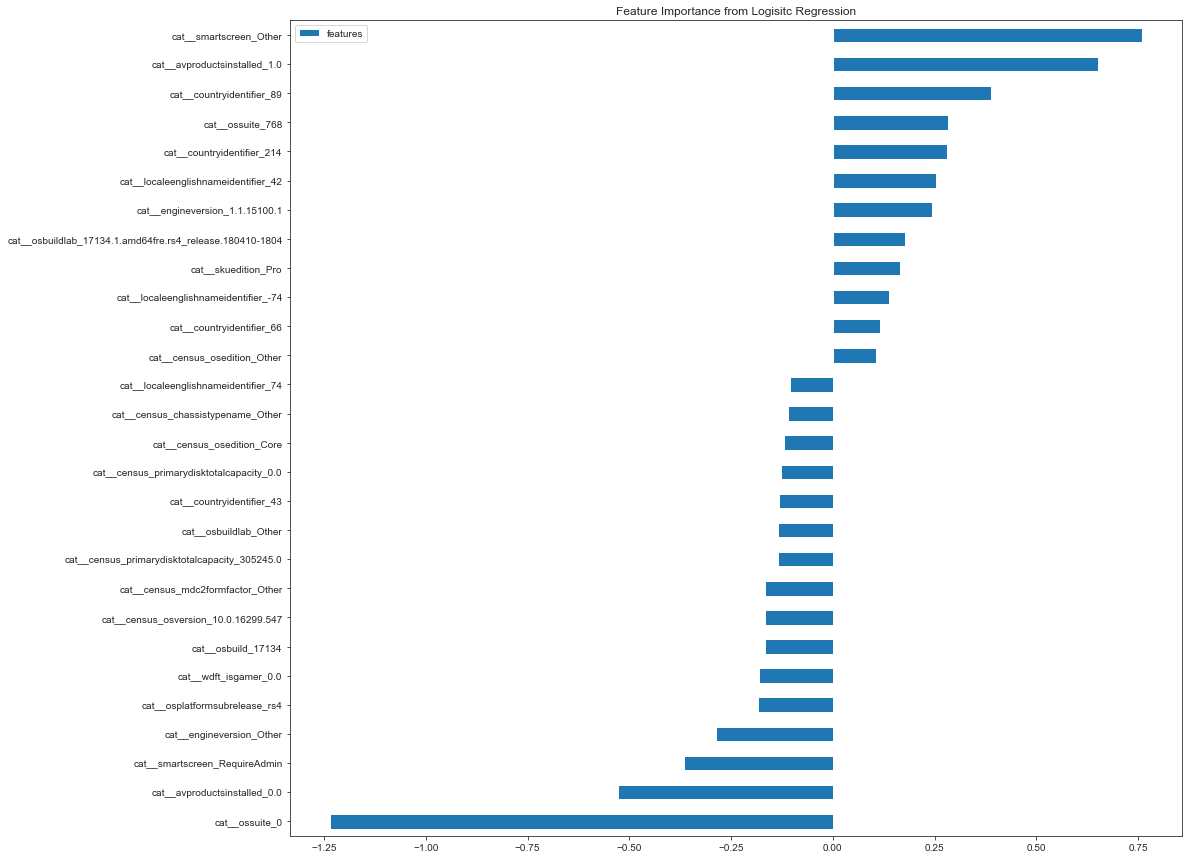

In [21]:
features_plot_lr(lr, 'Logisitc Regression')

From the features importance chart from the Logistic Regression, it can be seen that there are some features will affect the classification towards Class 0 and 1. 

Features that correspond to Class 1 (malware detected) are:
- Smartscreen_other: Microsoft Defender SmartScreen helps you identify reported phishing and malware websites and also helps you make informed decisions about downloads. This category is the combination of the other classes in this feature which includes values like Off for this feature which could explain why this feature is contributing to the classification of Class 1.
- Avproductsinstalled_1.0: A possible explanation could be that there could be a specific anti-virus software that is compromised during the time period that the data is scaped from which could lead to this feature contributing to this feature corresponding to Class 1.
- Countryidentifier_89
- Countryidentifier_214
- Skuedition_Pro: As for the OS edition, the pro version are contributing to Class 1 classification and this could be due to that attackers for ransomware are targeting enterprise customers who are using the Pro edition of the OS hence contributing to the classification of Class 1. 


Features that correspond to Class 0 (malware not detected) are:
- Ossuite_0: Combination of all other OS Suite version. 
- Avproductsinstalled_0: Unsure why this could be a feature corresponding to Class 0, might require more research.
- Smartscreen_RequireAdmin: Require Admin for this feature could mean that there is additional safeguards installed in the system which can improve security. 
- Countryidentifier_43

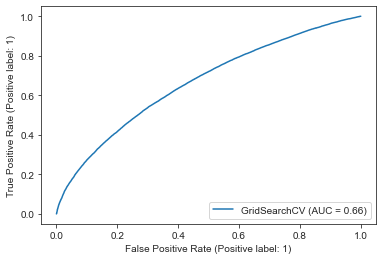

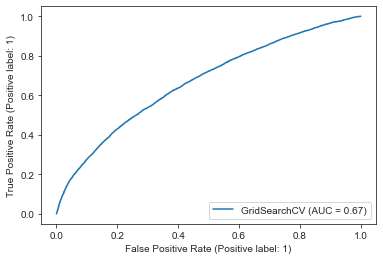

In [22]:
# plot the AUC ROC curve
plot_roc_curve(lr, X_train, y_train)
plot_roc_curve(lr, X_test, y_test);

In [23]:
# saving the model
filename_lr = '../models/model_lr.sav'
joblib.dump(lr, filename_lr)

['../models/model_lr.sav']

### Load Model (if needed)

In [12]:
# lr_load = joblib.load('../models/model_lr.sav')

In [20]:
# evaluate_model(X_train, X_test, y_train, y_test, lr_load, 'Logistic Regression')

Model: Logistic Regression
---Best Parameters---


{'lr__C': 0.4,
 'lr__class_weight': 'balanced',
 'lr__max_iter': 5000,
 'lr__penalty': 'l1',
 'lr__solver': 'liblinear'}

---Model Metrics---


{'train_auc': 0.665,
 'test_auc': 0.668,
 'precision': 0.627,
 'specificity': 0.647,
 'recall': 0.593,
 'f_score': 0.609}

,Predicted Negative,Predicted Postive
Actual Negative,8075,4413
Actual Postive,5095,7417


True Negatives: 8075
False Negatives: 5095
True Positives: 7417
False Positives: 4413



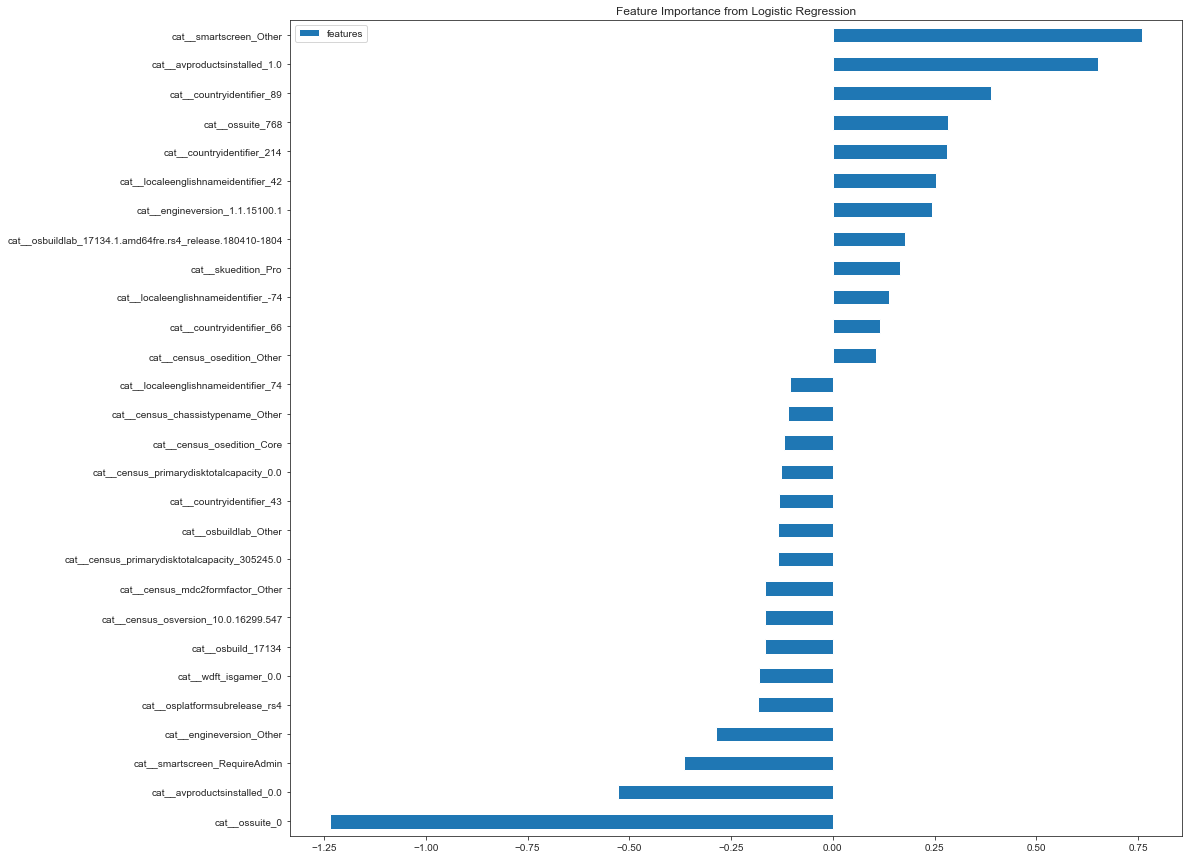

In [21]:
# features_plot_lr(lr_load, 'Logistic Regression')

## Model 2: K Neighbors Classifier

In [24]:
knn_params = {'knn__n_neighbors' : [42, 45, 47], # [4, 5, 6, 7, 8, 9, 10, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 36, 39, 42, 45, 47], default = 5
             'knn__weights' : ['uniform'], # ['uniform', 'distance'], default = 'uniform'
             'knn__algorithm' : ['auto'] # ['auto', 'ball_tree', 'kd_tree']
             }

In [25]:
%%time

knn = run_model(X_train, X_test, y_train, y_test, 'knn', mod_params = knn_params, grid_search = True)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
---Best Parameters---


{'knn__algorithm': 'auto', 'knn__n_neighbors': 47, 'knn__weights': 'uniform'}

Model: KNeighborsClassifier()
---Model Metrics---


{'model': 'knn',
 'train_auc': 0.681,
 'test_auc': 0.633,
 'precision': 0.599,
 'specificity': 0.611,
 'recall': 0.58,
 'f_score': 0.589}

,Predicted Negative,Predicted Postive
Actual Negative,7624,4864
Actual Postive,5253,7259


True Negatives: 7624
False Negatives: 5253
True Positives: 7259
False Positives: 4864

Wall time: 21min 52s


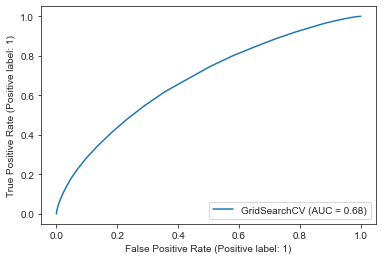

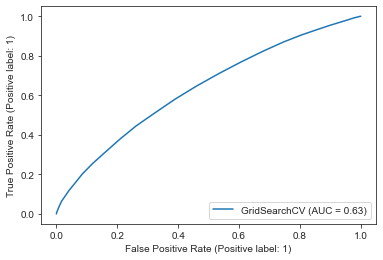

In [26]:
# plot the AUC ROC curve
plot_roc_curve(knn, X_train, y_train)
plot_roc_curve(knn, X_test, y_test);

In [27]:
# saving the model
filename_knn = '../models/model_knn.sav'
joblib.dump(knn, filename_knn)

['../models/model_knn.sav']

### Load Model (if needed)

In [22]:
# knn_load = joblib.load('../models/model_knn.sav')

In [23]:
# evaluate_model(X_train, X_test, y_train, y_test, knn_load, 'K Neighbors Classifier')

Model: K Neighbors Classifier
---Best Parameters---


{'knn__algorithm': 'auto', 'knn__n_neighbors': 47, 'knn__weights': 'uniform'}

---Model Metrics---


{'train_auc': 0.681,
 'test_auc': 0.633,
 'precision': 0.599,
 'specificity': 0.611,
 'recall': 0.58,
 'f_score': 0.589}

,Predicted Negative,Predicted Postive
Actual Negative,7624,4864
Actual Postive,5253,7259


True Negatives: 7624
False Negatives: 5253
True Positives: 7259
False Positives: 4864



## Model 3: Random Forest Classifier

In [28]:
rf_params = {'rf__n_estimators': [300], # [50, 100, 150, 200, 250, 300, 400, 500] # default = 100
             'rf__min_samples_split' : [2], # [2, 4, 6, 8], default = 2
             'rf__max_depth': [13], # [5, 7, 9, 11, 13, 15, 17, 19], default = None
             'rf__min_samples_leaf': [8], # [3, 5, 7, 8, 9, 10, 11], default = 1
             'rf__class_weight' : ['balanced'] # ['balanced', 'balanced_subsample'], default = None
            }

In [29]:
%%time

rf = run_model(X_train, X_test, y_train, y_test, 'rf', mod_params = rf_params, grid_search = True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
---Best Parameters---


{'rf__class_weight': 'balanced',
 'rf__max_depth': 13,
 'rf__min_samples_leaf': 8,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 300}

Model: RandomForestClassifier(random_state=42)
---Model Metrics---


{'model': 'rf',
 'train_auc': 0.745,
 'test_auc': 0.678,
 'precision': 0.642,
 'specificity': 0.676,
 'recall': 0.581,
 'f_score': 0.61}

,Predicted Negative,Predicted Postive
Actual Negative,8439,4049
Actual Postive,5238,7274


True Negatives: 8439
False Negatives: 5238
True Positives: 7274
False Positives: 4049

Wall time: 4min 37s


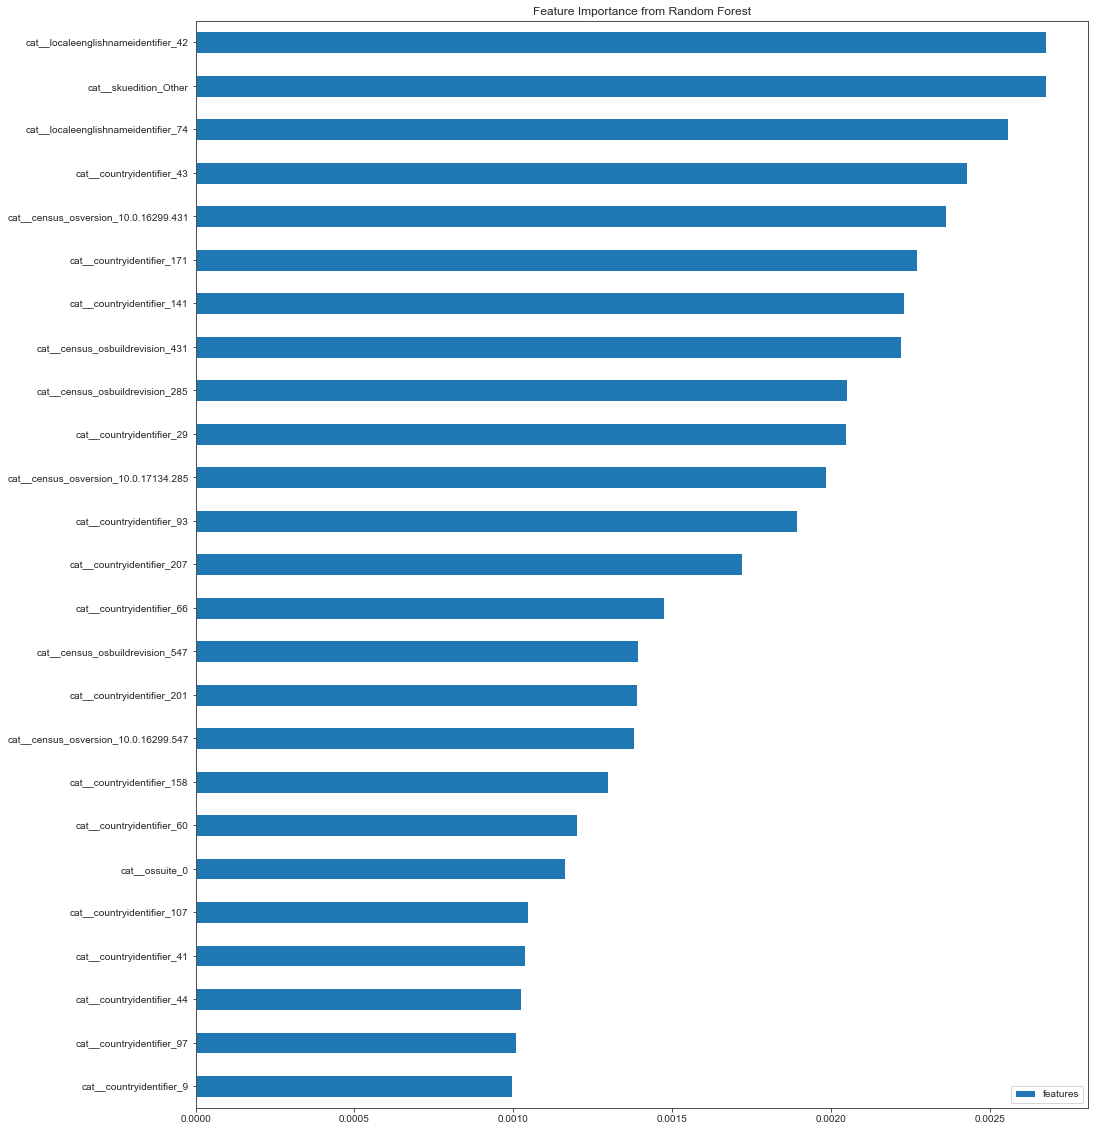

In [30]:
features_plot(rf, 'Random Forest')

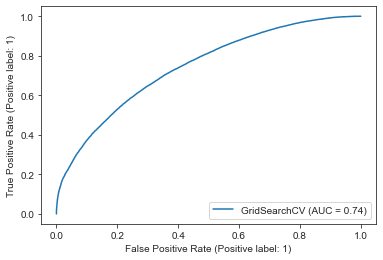

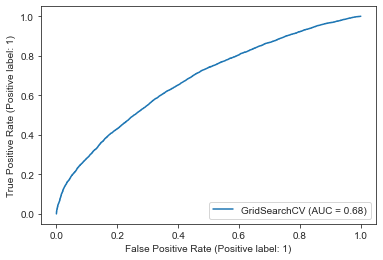

In [31]:
# plot the AUC ROC curve
plot_roc_curve(rf, X_train, y_train)
plot_roc_curve(rf, X_test, y_test);

In [32]:
# saving the model
filename_rf = '../models/model_rf.sav'
joblib.dump(rf, filename_rf)

['../models/model_rf.sav']

### Load Model (if needed)

In [29]:
# rf_load = joblib.load('../models/model_rf.sav')

In [30]:
# evaluate_model(X_train, X_test, y_train, y_test, rf_load, 'Random Forest')

Model: Random Forest
---Best Parameters---


{'rf__class_weight': 'balanced',
 'rf__max_depth': 13,
 'rf__min_samples_leaf': 8,
 'rf__min_samples_split': 2,
 'rf__n_estimators': 300}

---Model Metrics---


{'train_auc': 0.745,
 'test_auc': 0.678,
 'precision': 0.642,
 'specificity': 0.676,
 'recall': 0.581,
 'f_score': 0.61}

,Predicted Negative,Predicted Postive
Actual Negative,8439,4049
Actual Postive,5238,7274


True Negatives: 8439
False Negatives: 5238
True Positives: 7274
False Positives: 4049



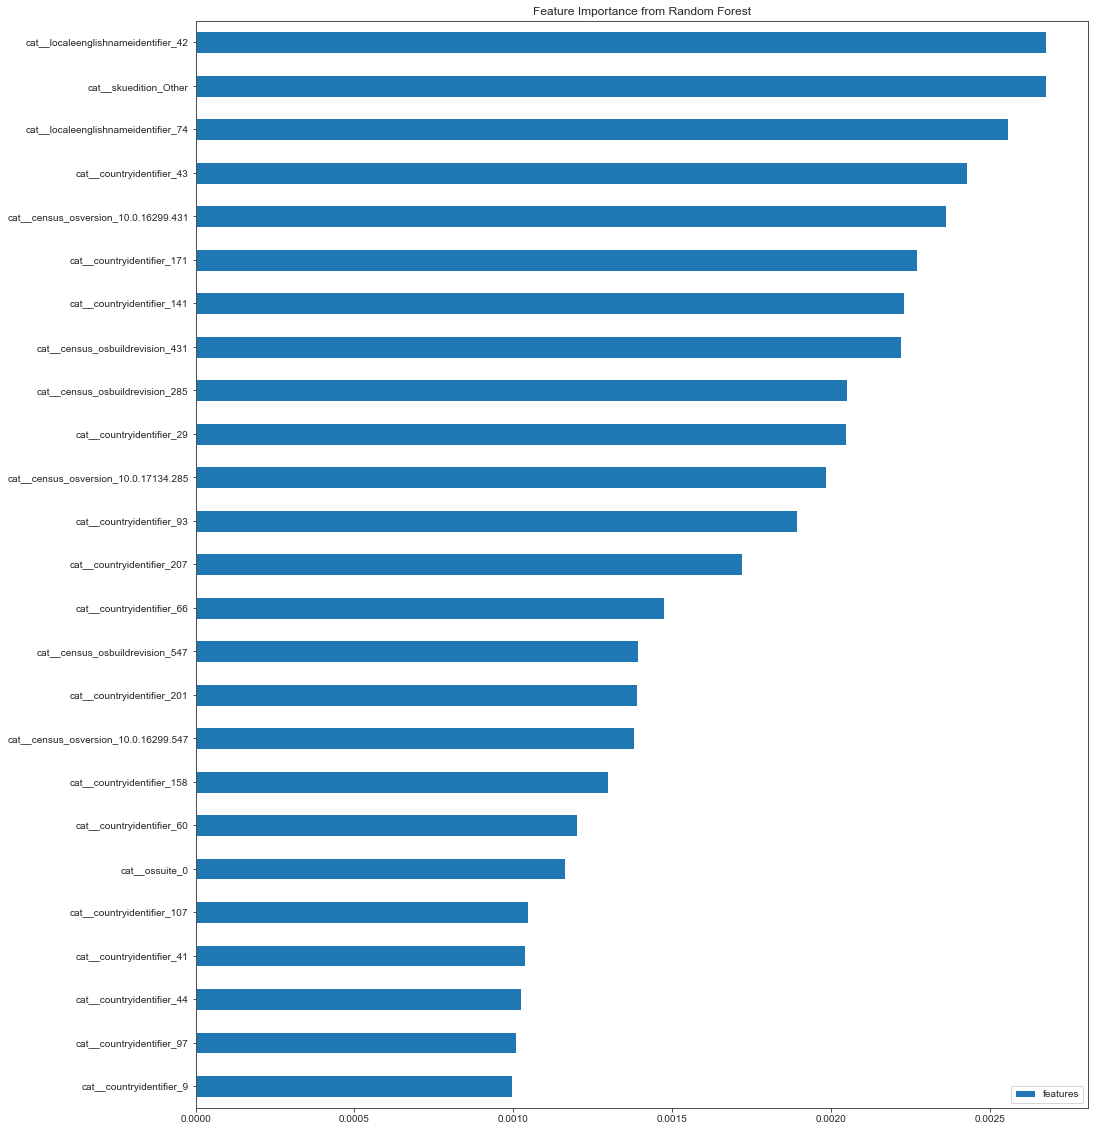

In [31]:
# features_plot(rf_load, 'Random Forest')

## Model 4: Light GBM

Introduced by Microsoft, Light Gradient Boosting or LightGBM is a highly efficient gradient boosting decision tree algorithm. [LightGBM](https://lightgbm.readthedocs.io/en/latest/index.html) is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:

- Faster training speed and higher efficiency.
- Lower memory usage.
- Better accuracy.
- Support of parallel, distributed, and GPU learning.
- Capable of handling large-scale data.

From the description of Light GBM under the [features](https://lightgbm.readthedocs.io/en/latest/Features.html) section, the difference of Light GBM compared with other decision tree learning algorithm is that Light GBM will grow trees leaf-wise instead of level-wise. Light GBM will choose the leaf with the max delta loss to grow. 

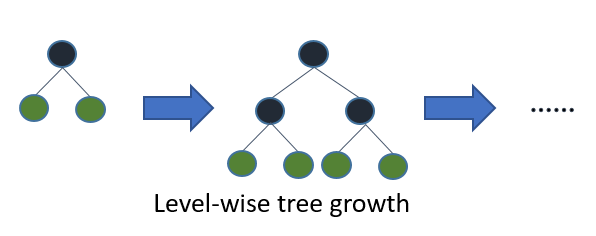

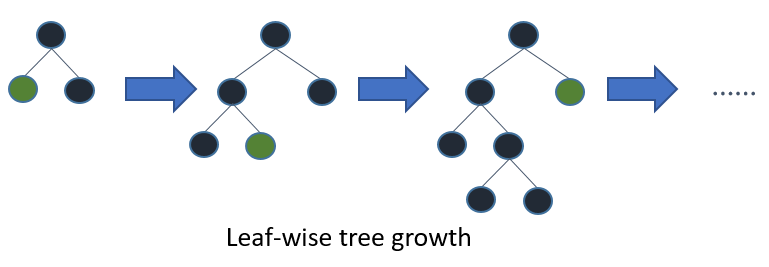

Even those leaf-wise growth might result in over-fitting when data is small, there are parameters within Light GBM to try to mitigate this.

In [26]:
# to create a duplicate dataframe for use with Light GBM as will be changing the datatype to 'category'
train_sample1 = train_sample
for col in train_sample1.columns.tolist():
    train_sample1[col] = train_sample1[col].astype("category")

X1 = train_sample1.drop(columns = ['machineidentifier', 'hasdetections'])
y1 = train_sample1['hasdetections']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state = 42, stratify = y)

In [37]:
lgb_params = {'lgb__num_iterations' : [500], # [150, 300, 500, 800, 1000], default = 100
               'lgb__learning_rate' : [0.1], # [0.1, 0.3, 0.5], default = 0.1
               'lgb__num_leaves': [8], # [8, 32, 64, 128], default = 31, leaves = 2^max_depth
               'lgb__min_data_in_leaf': [100], # [50, 100, 150, 300], default = 20
               'lgb__max_depth': [5], # [3, 5, 6, 7], default = -1
               'lgb__min_child_samples' : [100], #[100, 200, 300], default = 20
               'lgb__bagging_fraction' : [0.8], #[0.8, 0.9, 1.0], default = 1.0
               'lgb__feature_fraction' : [0.9], #[0.8, 0.9, 1.0], default = 1.0
               'lgb__categorical_feature': ['auto'], #['auto'] default = auto
               'lgb__metrics': ['auc']
              }

In [38]:
%%time

lgb = run_model(X_train1, X_test1, y_train1, y_test1, 'lgb', mod_params = lgb_params, grid_search = True)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=100 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
---Best Parameters---


{'lgb__bagging_fraction': 0.8,
 'lgb__categorical_feature': 'auto',
 'lgb__feature_fraction': 0.9,
 'lgb__learning_rate': 0.1,
 'lgb__max_depth': 5,
 'lgb__metrics': 'auc',
 'lgb__min_child_samples': 100,
 'lgb__min_data_in_leaf': 100,
 'lgb__num_iterations': 500,
 'lgb__num_leaves': 8}

Model: LGBMClassifier(objective='binary', random_state=42)
---Model Metrics---


{'model': 'lgb',
 'train_auc': 0.706,
 'test_auc': 0.682,
 'precision': 0.641,
 'specificity': 0.663,
 'recall': 0.599,
 'f_score': 0.619}

,Predicted Negative,Predicted Postive
Actual Negative,8280,4208
Actual Postive,5012,7500


True Negatives: 8280
False Negatives: 5012
True Positives: 7500
False Positives: 4208

Wall time: 6.78 s


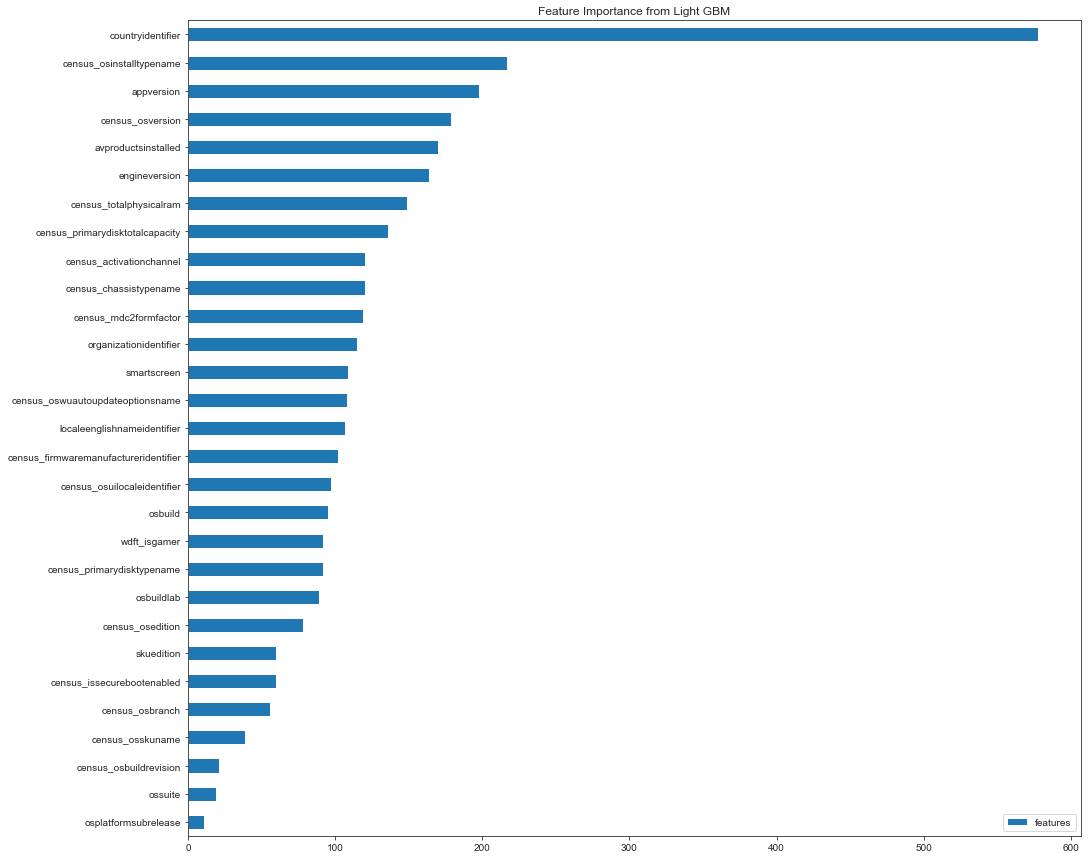

In [39]:
features_plot_lgb(lgb, 'Light GBM')

Looking at the feature importance chart from the LightGBM model, it can be seen that the top 5 features like `CountryIdentifier`, `Census_OSInstallTypeName`, `AppVersion`, `Census_OSVersion`, `AVProductsInstalled` influence the model to a large extent. The more an attribute is used to make key decisions with decision trees, the higher its relative importance. However, due to the model being a variant of Gradient Boosting, the feature importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The features importances cannot be interpreted to skew towards either class.

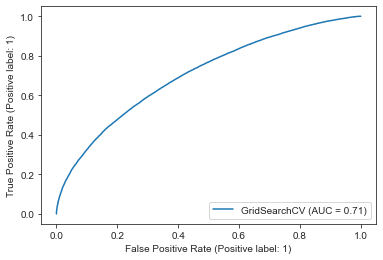

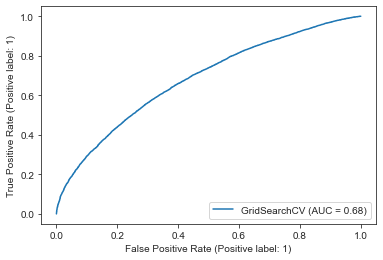

In [40]:
# plot the AUC ROC curve
plot_roc_curve(lgb, X_train1, y_train1)
plot_roc_curve(lgb, X_test1, y_test1);

In [41]:
# saving the model
filename_lgb = '../models/model_lgb.sav'
joblib.dump(lgb, filename_lgb)

['../models/model_lgb.sav']

### Load Model (if needed)

In [25]:
lgb_load = joblib.load('../models/model_lgb.sav')

In [27]:
evaluate_model(X_train1, X_test1, y_train1, y_test1, lgb_load, 'Light GBM')

Model: Light GBM
---Best Parameters---


{'lgb__bagging_fraction': 0.8,
 'lgb__categorical_feature': 'auto',
 'lgb__feature_fraction': 0.9,
 'lgb__learning_rate': 0.1,
 'lgb__max_depth': 5,
 'lgb__metrics': 'auc',
 'lgb__min_child_samples': 100,
 'lgb__min_data_in_leaf': 100,
 'lgb__num_iterations': 500,
 'lgb__num_leaves': 8}

---Model Metrics---


{'train_auc': 0.706,
 'test_auc': 0.682,
 'precision': 0.641,
 'specificity': 0.663,
 'recall': 0.599,
 'f_score': 0.619}

,Predicted Negative,Predicted Postive
Actual Negative,8280,4208
Actual Postive,5012,7500


True Negatives: 8280
False Negatives: 5012
True Positives: 7500
False Positives: 4208



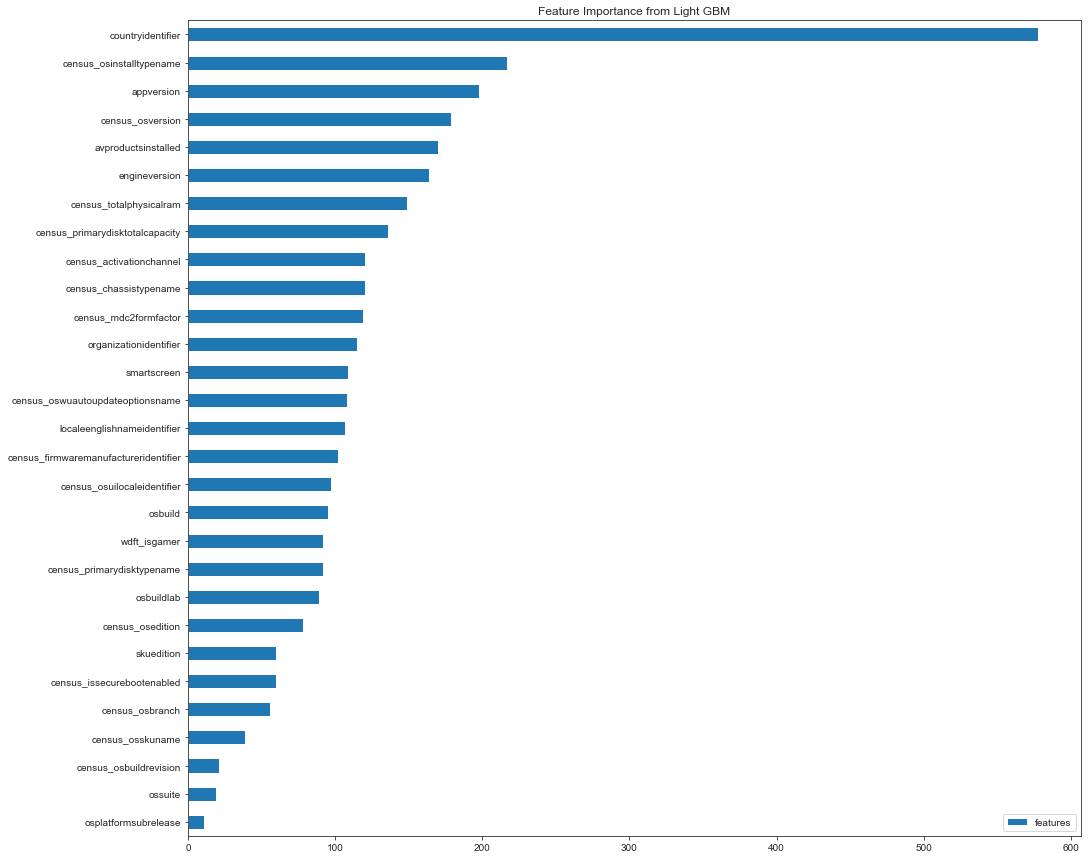

In [28]:
features_plot_lgb(lgb_load, 'Light GBM')

## Model 5: Keras Sequential Neural Network

### Data Preprocessing for Model 5

In [23]:
# OHE encoder and fit/transform to X_train, X_test
ohe = OneHotEncoder(drop = 'first')
X_train_oh = ohe.fit_transform(X_train)
X_test_oh = ohe.transform(X_test)

In [24]:
# changing the X_train and X_test to array type
X_train_oh = X_train_oh.toarray()
X_test_oh = X_test_oh.toarray()

In [25]:
# check the shape of X_train
n_input = X_train_oh.shape[1]
n_input

82

In [26]:
# Modeling
model_nn = Sequential()
model_nn.add(Dense(82, input_shape = (n_input,), activation = 'relu'))
model_nn.add(Dense(40, activation = 'relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(20, activation = 'relu'))
model_nn.add(Dropout(0.2))
model_nn.add(Dense(1, activation = 'sigmoid'))
es = EarlyStopping(monitor = 'val_loss', mode = 'auto', verbose = 1, patience = 5) 
model_nn.compile(loss = 'binary_crossentropy', 
                 optimizer = 'adam', 
                 metrics = [AUC(), Precision(),
                            Recall()])

In [27]:
history = model_nn.fit(X_train_oh, y_train, 
                       validation_data = (X_test_oh, y_test), 
                       epochs = 100, 
                       batch_size = 512, 
                       verbose = 1,
                       callbacks = [es])

Epoch 1/100
147/147 [==============================] - 2s 5ms/step - loss: 0.6729 - auc: 0.6104 - precision: 0.5845 - recall: 0.5416 - val_loss: 0.6548 - val_auc: 0.6547 - val_precision: 0.6039 - val_recall: 0.6367
Epoch 2/100
147/147 [==============================] - 0s 2ms/step - loss: 0.6541 - auc: 0.6544 - precision: 0.6267 - recall: 0.5563 - val_loss: 0.6484 - val_auc: 0.6644 - val_precision: 0.6398 - val_recall: 0.5421
Epoch 3/100
147/147 [==============================] - 0s 2ms/step - loss: 0.6500 - auc: 0.6622 - precision: 0.6339 - recall: 0.5590 - val_loss: 0.6465 - val_auc: 0.6693 - val_precision: 0.6288 - val_recall: 0.5973
Epoch 4/100
147/147 [==============================] - 0s 2ms/step - loss: 0.6478 - auc: 0.6667 - precision: 0.6340 - recall: 0.5795 - val_loss: 0.6455 - val_auc: 0.6712 - val_precision: 0.6588 - val_recall: 0.5077
Epoch 5/100
147/147 [==============================] - 0s 2ms/step - loss: 0.6456 - auc: 0.6708 - precision: 0.6373 - recall: 0.5795 - val_l

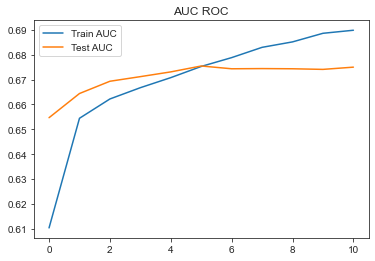

In [28]:
plt.plot(history.history['auc'], label = 'Train AUC')
plt.plot(history.history['val_auc'], label = 'Test AUC')
plt.title('AUC ROC')
plt.legend()

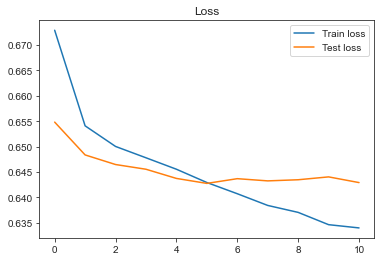

In [29]:
plt.plot(history.history['loss'], label = 'Train loss')
plt.plot(history.history['val_loss'], label = 'Test loss')
plt.title("Loss")
plt.legend()

In [30]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 82)                6806      
                                                                 
 dense_1 (Dense)             (None, 40)                3320      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10,967
Trainable params: 10,967
Non-traina

In [31]:
# save the neural network model
model_nn.save("../models/model_nn")

INFO:tensorflow:Assets written to: ../models/model_nn\assets


### Load Model (if needed)

In [32]:
# model_nn_load = keras.models.load_model("../models/model_nn")

In [33]:
# model_nn_load.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 82)                6806      
                                                                 
 dense_1 (Dense)             (None, 40)                3320      
                                                                 
 dropout (Dropout)           (None, 40)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                820       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 10,967
Trainable params: 10,967
Non-traina

## Plot AUC ROC curves for all models

In [51]:
def plot_roc_curves(model_dict):
    """Function to plot all the ROC AUC curves of the models"""
    fig, ax = plt.subplots(1, 1, figsize=(12,10))
    axes = {}
    for i, m in enumerate(model_dict.keys()):
        if m != lgb:
            axes[f'ax{i}'] = plot_roc_curve(m, X_test, y_test, ax = ax, name = model_dict[m])
        elif m == lgb:
            axes[f'ax{i}'] = plot_roc_curve(m, X_test1, y_test1, ax = ax, name = model_dict[m])
   
    plt.plot([0, 1], [0, 1], color ='black', lw = 2, linestyle = '--', label = 'Baseline')
    plt.title('ROC-AUC Curves Comparison', fontsize=22)
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate', fontsize=14)
    plt.legend(fontsize=12)

In [52]:
# define a dictionary of the models for use in the function
test_models = {
    lr: "Logistic Regression",
    knn: "K Neighbors Classifer",
    rf: "Random Forest Classifier",
    lgb: "Light GBM"
}

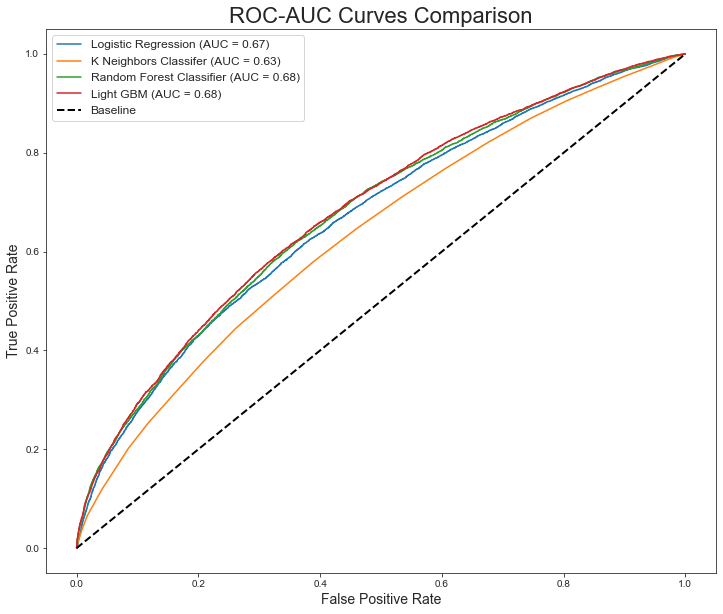

In [53]:
# plot the ROC-AUC curves of all the models
plot_roc_curves(test_models)

# Model Evaluation and Results

**Baseline Model Score = 0.50**


|        **Models**        | **Train AUC ROC** | **Test AUC ROC** | **Precision** | **Recall** | **F-score** |
|:------------------------:|:-----------------:|:----------------:|:-------------:|:----------:|:-----------:|
| Logistic Regression      |       0.665       |       0.668      |     0.627     |    0.593   |    0.609    |
| K-Neighbors Classifier   |       0.681       |       0.633      |     0.599     |    0.580   |    0.589    |
| Random Forest Classifier |       0.745       |       0.678      |     0.642     |    0.581   |     0.61    |
| Light GBM                |       0.706       |       0.682      |     0.641     |    0.599   |    0.619    |
| Keras Sequential NN      |       0.700       |       0.671      |     0.656     |    0.619   |     N/A     |

For this classification problem, the main metric to be used would be AUC ROC curve based on the Kaggle competition. 

Looking at the context of this classification problem, the consequence of not identifying a false negative (i.e. not identifying the malware when there is malware on the machine) is more serious that getting a false positive (i.e. identifying the presence of a malware when there is no malware presence) as the only cost is some time needed to scan the machine and rectify compared to the consequences of having a malware on the machine. Some of the consequences of having malware include slowing connection, slowing down the performance of your machine, identify theft from personal information and hackers gaining access to the machine [(source)](https://techgenix.com/malwares-impact-serious-long-lasting/).

As such, the additional metric that will be used shall be Recall as it is the percentage of malware detected and this would represent a focus on finding the positive cases and to reduce the false negatives.

From the above table of model results, and looking at the AUC ROC scores and Recall scores, the best model would be the Light GBM model as it has the best test AUC ROC score at 0.682 as well as the best recall score 0.599. A possible reason that Light GBM can perform better is that Light GBM is a variant of Gradient Boosting Classifier, it is able to naturally handle of mixed data types, good predictive power and robustness to outliers.  

The AUC ROC score is better than the baseline of 0.5 but it is still unable to correctly classify 32% of the dataset which is not ideal. These limitations shall be explored in the Conclusion section below.



# Conclusion
***

As summarized in the above paragraph, the best model would be the Light GBM based on the test AUC ROC and Recall score. There are some limitations that have been identified and some proposed future works are included to improve the model with no constraints in time and hardware. 

Recommendations are also included to answer the problem statement.


## Limitations
There are several limitations in the modeling due to the features in the dataset. As explained in Notebook 1 during EDA and data cleaning, the features in this dataset have several issues like high cardinality and null values where the values have to be managed and imputed accordingly respective. There could be some information loss with the type of imputation being used and the method in which the issue of high cardinality is dealt with. 

In addition, several of the features are masked at the source for confidentiality and that could make certain features hard to understand or interpret. `Country Identifier` feature is masked and this could affect the way the encoding could have been done. Instead, the countries could have be group by regions and this might yield better results. 

Constrains in hardware and time are also issues where the entire `train` dataset cannot be used for training due to the sheer number of rows and this could result in loss of certain patterns and trends in the features outside of the dependent feature. 

The dataset seems to be obtained in 2018 and the values in the features is likely to be outdated as computer technology moves at a fast pace and the trained model is not likely to do well trying to predict malware in machines in 2022. The data should be updated on a yearly basis to ensure the latest information is available for the model to train on. 

The dataset only identifies if the machine is infected by malware but did not specify the type of malware that the machine is infected by. If more information on the type of malware that the machine can be provided then, it could produce a more useful model.

## Future Works
Some of the improvements that can be made in future works:
- Including extra time series information based on the time where the `train` and `test` dataset are scraped. The majority of train data are observations in August and September 2018 while test data is October and November 2018 [(Kaggle post source)](https://www.kaggle.com/cdeotte/time-series-eda-malware-0-64).
- As the information in some of the features are masked for confidentiality like in features `Country Identifier`, `Census_FirmwareManufacturerIdentifier` and the codes used to represent the classes within the features are not interpretable. This would affect some of the methods of imputation or encoding that can be done for those features which can lead to some loss in information during modeling.
- The number of rows used for training is only 100,000 rows due to the limitations in time and hardware which could lead to some information loss when the entire `train` dataset is not used. This can lead to a slightly poorer performance of the models.

## Recommendations
Some recommendations for the company:
- Using the feature importances from the models tested, the company can focus additional efforts in devising stronger security protocols or solutions for industries, countries or certain OS build versions that are more vulnerable to malware attacks. 
- The company can look to recommend users in regions and industries that could be more vulnerable to malware attacks to upgrade the operating system for more security features based on this model results.




# Kaggle Submission
***

In [64]:
kaggle_df = test[['machineidentifier']]
kaggle_df.rename(columns={'machineidentifier': 'MachineIdentifier'}, inplace = True)

In [65]:
# create a new dataframe as the preprocessing is different for LGBM model
test2 = test.copy()
test2.drop(columns = ['machineidentifier'], inplace = True)
test2.head()

,engineversion,appversion,avproductsinstalled,countryidentifier,organizationidentifier,localeenglishnameidentifier,osbuild,ossuite,osplatformsubrelease,osbuildlab,...,census_osbuildrevision,census_osedition,census_osskuname,census_osinstalltypename,census_osuilocaleidentifier,census_oswuautoupdateoptionsname,census_activationchannel,census_firmwaremanufactureridentifier,census_issecurebootenabled,wdft_isgamer
0,1.1.15400.5,4.18.1810.5,1.0,43,18.0,42,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,...,1387,Core,CORE,Reset,158,AutoInstallAndRebootAtMaintenanceTime,OEM:DM,807.0,1,0.0
1,1.1.15400.4,4.18.1809.2,1.0,68,0.0,74,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,...,611,Core,CORE,UUPUpgrade,30,AutoInstallAndRebootAtMaintenanceTime,Retail,554.0,1,1.0
2,1.1.15300.6,4.18.1809.2,2.0,201,0.0,-5,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,...,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,148,UNKNOWN,OEM:DM,556.0,1,1.0
3,1.1.15400.5,4.18.1810.5,2.0,29,0.0,-85,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,...,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,119,Notify,OEM:DM,628.0,1,0.0
4,1.1.15400.4,4.18.1809.2,1.0,171,18.0,-74,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,...,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,125,UNKNOWN,Retail,556.0,1,1.0


In [66]:
# changing all the data type to "category"
for col in test2.columns.tolist():
    test2[col] = test2[col].astype("category")

In [70]:
kaggle_pred = lgb.predict(test2)
kaggle_pred

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
kaggle_df['HasDetections'] = kaggle_pred

In [72]:
kaggle_df.head()

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,1
1,00000176ac758d54827acd545b6315a5,1
2,0000019dcefc128c2d4387c1273dae1d,0
3,0000055553dc51b1295785415f1a224d,0
4,00000574cefffeca83ec8adf9285b2bf,1


In [73]:
kaggle_df.to_csv('../data/kaggle_df.csv', index = False)

### Kaggle Results

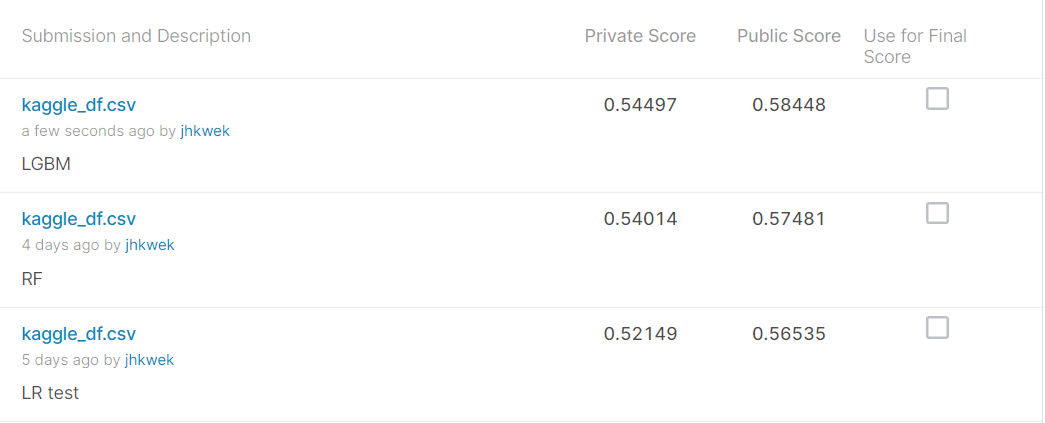

The results are good when compared to the top of the leaderboard (Public score: 0.714, Private score: 0.6756) but that is to be expected as the original train dataset is randomly sampled to 100,000 rows for modeling due to constraints and it would not be able to yield a good result for a test data set of 7.8million rows. 